<a href="https://colab.research.google.com/github/Terrencebosco/Build_week_2/blob/master/build_week_2_(working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cleaning and formatting working data set 

In [1]:
# # # imports
!pip install category_encoders
!pip install xgboost
!pip install eli5
!pip install pdpbox
!pip install shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from eli5.sklearn import PermutationImportance
import eli5
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
import shap

# read in data
url = 'https://raw.githubusercontent.com/Terrencebosco/Build_week_2/master/test_data_2'
df = pd.read_csv(url)

# remove rows that do not match format of columns (out of order when scraped)
columns_list = df.columns.to_list()
for column in columns_list:
    df = df[~df[column].str.contains('Stock:')]

# remove 'certified'

my_drop_list = ['Mileage:','Certified']
for string in my_drop_list:
    df['car'] = df['car'].mask(df['car'].str.contains(string),df['car'].str.replace(string,''))

# remove spaces in front car names
df['car'] = df['car'].str.strip(' ')

# new feature for car year
df['car_year'] = df['car'].str.slice(stop=4)

# remove car year from car feature
df['car'] = df['car'].str[5:]

# # get make of car feature
df['make'] = df['car'].str.split().str.get(0)
# remove make of car from 'car' feature
df['car'] = df['car'].str.split(n=1).str[1]

# remove un wanted text from df in color columns.
## ext color
df['ext_color'] = df['ext_color'].str.strip('Exterior Color:')
## int color
df['int_color'] = df['int_color'].str.strip('Interior Color:')

# remove straggling rows with miss match formatting (see function at top)
columns_list = df.columns.to_list()
my_drop_list_2 = ['Stock:','Interior Color','VIN',':']
for column in columns_list:
    for string in my_drop_list_2:
        df = df[~df[column].str.contains(string)]


# remove unwanted text from engine columns
my_drop_list_3 = ['Gas','Regular','Unleaded ','I4 ']
for string in my_drop_list_3:
    df['engine'] = df['engine'].str.strip(string)

# create engine size feature
df[['size','engine']] = df['engine'].str.split(n=1, expand=True)
df['size'] = df['size'].str.strip('L')
df['size'] = df['size'].str.strip('-')

## has turbo
df['turbo'] = np.where(df['engine'].str.contains('turbo', case=False), 1, 0)

# chaneg transmission from multi type to binary (automatic = 1, not automatic = 0)
df['transmission'] = np.where(df['transmission'].str.contains('automatic', case=False), 1 ,0)

#sperate drivetrain into new columns for computation
df['rear_wheel_drive'] = np.where(df['drivetrain'].str.contains('RWD',case=False), 1, 0)
df['all_wheel_drive'] = np.where(df['drivetrain'].str.contains('4WD|4X4|AWD'), 1, 0)
df['front_wheel_drive'] = np.where(df['drivetrain'].str.contains('FWD|2WD', case=False), 1, 0)
df = df.drop(columns='drivetrain')

# drop missing values 
df.fillna(value=np.nan, inplace=True)
df.dropna(inplace=True)

# remove unwanted strings from price
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')

# remove unwanted strings from mileage
df['mileage'] = df['mileage'].replace('-- ',np.nan)
df['mileage'] = df['mileage'].str.replace(',', '')
df['mileage'] = df['mileage'].str.replace('miles', '')

# make feature for the type model of car
df['car_type'] = df['car'].str.split().str.get(0)
df['car'] = df['car'].str.split(n=1).str[1]


# color formatting
## replace car colors with known color 
df.loc[df['ext_color'].str.contains('Maroon'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Magnetic'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Green'), 'ext_color'] = 'Green'
df.loc[df['ext_color'].str.contains('Gold'), 'ext_color'] = 'Gold'
df.loc[df['ext_color'].str.contains('Sea'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Brown'), 'ext_color'] = 'Brown'
df.loc[df['ext_color'].str.contains('Metal'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Cherry'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Pea'), 'ext_color'] = 'Green'
df.loc[df['ext_color'].str.contains('Indigo'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Tan'), 'ext_color'] = 'Brown'
df.loc[df['ext_color'].str.contains('red'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('Titanium'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Yellow'), 'ext_color'] = 'Yellow'
df.loc[df['ext_color'].str.contains('Wh'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Silv'), 'ext_color'] = 'Silver'
df.loc[df['ext_color'].str.contains('Grey'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Red'), 'ext_color'] = 'Red'
df.loc[df['ext_color'].str.contains('White'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Black'), 'ext_color'] = 'Black'
df.loc[df['ext_color'].str.contains('Blu'), 'ext_color'] = 'Blue'
df.loc[df['ext_color'].str.contains('Graph'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Granite'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Powd'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Wh'), 'ext_color'] = 'White'
df.loc[df['ext_color'].str.contains('Gun'), 'ext_color'] = 'Grey'
df.loc[df['ext_color'].str.contains('Burgundy'), 'ext_color'] = 'Red'

## format known int car color
df.loc[df['int_color'].str.contains('Black'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('Gray'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Beig'), 'int_color'] = 'Beige'
df.loc[df['int_color'].str.contains('black'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('Blu'), 'int_color'] = 'Blue'
df.loc[df['int_color'].str.contains('BLACK'), 'int_color'] = 'Black'
df.loc[df['int_color'].str.contains('GRAY'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Grey'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Browns'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Brown'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Ta'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Medium Light S'), 'int_color'] = 'Gray'
df.loc[df['int_color'].str.contains('Ebony'), 'int_color'] = 'Brown'
df.loc[df['int_color'].str.contains('Ash'), 'int_color'] = 'Gray'

# get list of int colors i want
int_color =  df['int_color'].value_counts().head(5).index.to_list()
# chance all colors no known to 'other' (from list)
df.loc[~df['int_color'].isin(int_color), 'int_color'] = 'Other'

# get list of colors i want
car_color =  df['ext_color'].value_counts().head(10).index.to_list()
# chance all colors no known to 'other' (from list)
df.loc[~df['ext_color'].isin(car_color), 'ext_color'] = 'Other'

# remove missformated rows
drop_list = ['Turbocharged','/Electric','ntercooled','/Ethanol','ECOTEC','Cyl','V-6','V6']
for i in drop_list:
    df = df[~df['size'].str.contains(i)]

# change type for numeric features 
to_num_list = ['city_mpg', 'high_mpg', 'car_year','price', 'mileage', 'size']
for i in to_num_list:
    df[i] = pd.to_numeric(df[i])

# remove outliers
df = df[df['mileage']<=250000]

# re index data frame
df = df.reindex()

def replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df):
  """
  Accepts a dataframe.
  Alters column names- replacing spaces with '_' and column names lowercase.
  Returns a dataframe.
  """
  labels = list(df.columns)
  for i in range(len(df.columns)):
    labels[i] = labels[i].replace(' ', '_')
    labels[i] = labels[i].lower()
  df.columns = labels
  return df
# Invokes the function
df = replace_spaces_with_underscore_in_column_names_and_make_lowercasee(df)

# shape
df.shape

     |████████████████████████████████| 81kB 2.4MB/s 
     |████████████████████████████████| 112kB 3.3MB/s 
     |████████████████████████████████| 57.7MB 68kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=347f16248e923e738292de7b3b8c4924f93e9ddd896ad22332eb6f6c8758ff87
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 276kB 3.0MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394111 sha256=cdb10d3dbf19b97f2b17a39402cb6f75e06e94888815c9dc6e2e76019b54c3da
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of th

(2119, 17)

In [2]:
df = df.drop('car', axis=1)

In [3]:
## make csv for github 
# df.to_csv('clean_data_set_2_v2', index=False)

## EDA working data set 

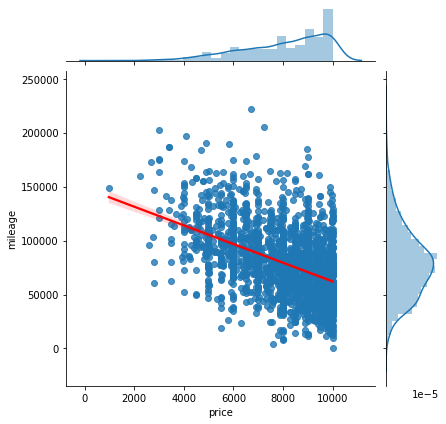

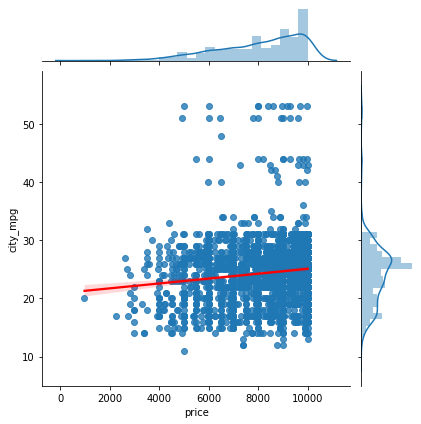

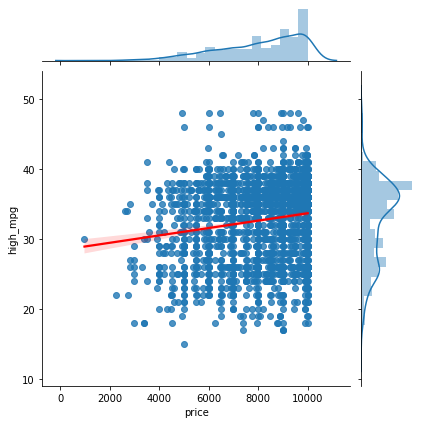

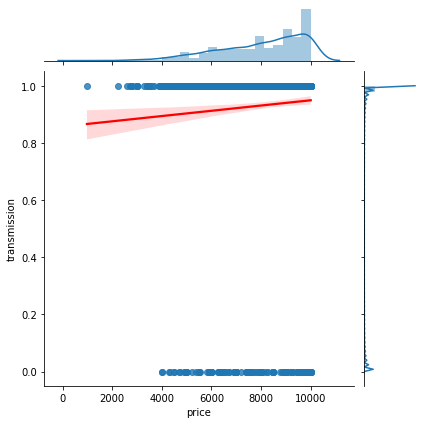

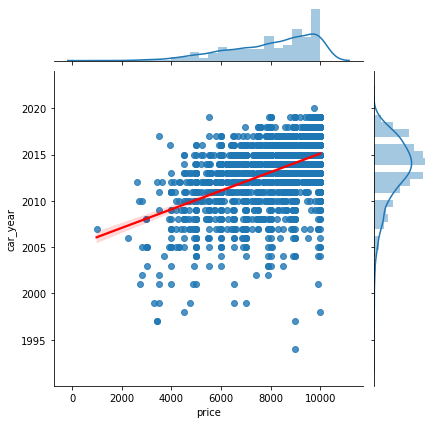

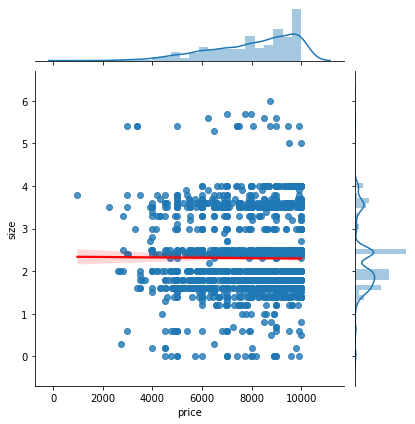

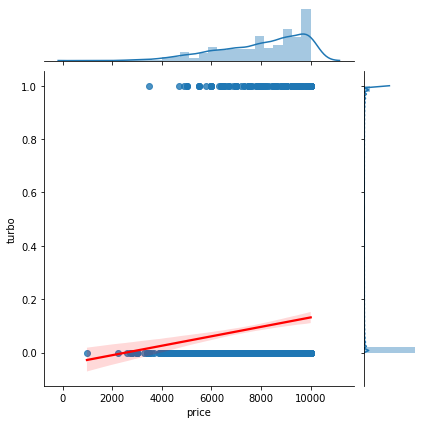

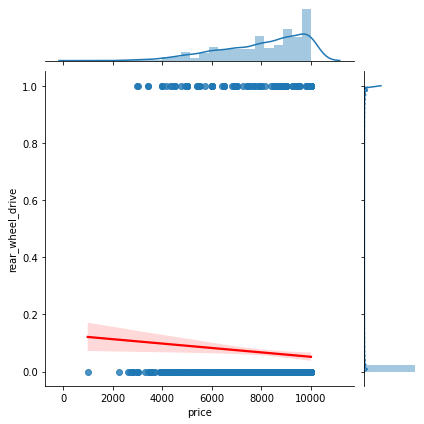

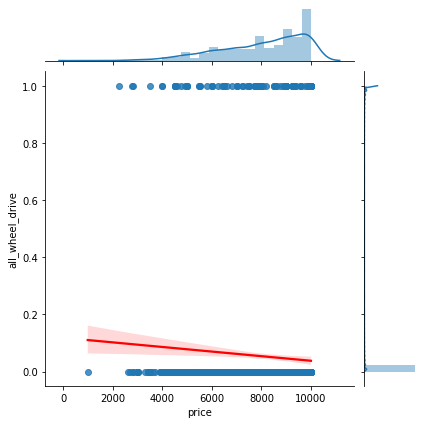

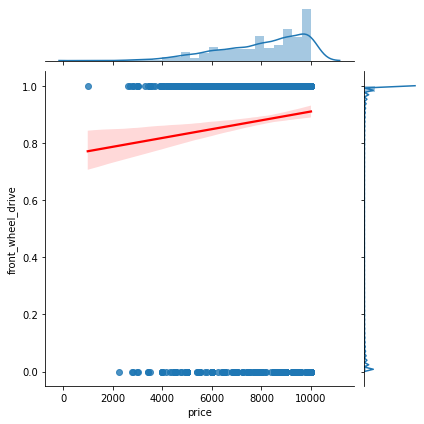

In [4]:
numeric_features_list = df.select_dtypes(exclude=object)
numeric_features_list = numeric_features_list.drop('price', axis=1)

for feature in numeric_features_list:
    sns.jointplot(x='price', y=feature, data=df, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}});

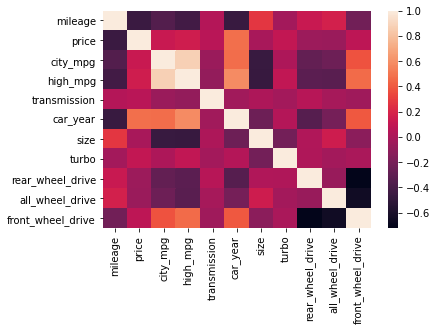

In [5]:
x_tab = df.corr()

sns.heatmap(x_tab)

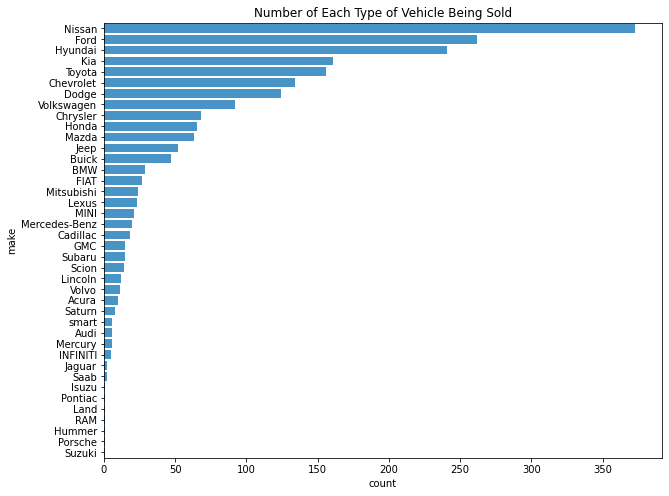

In [6]:
# plot number of cars by 'make'
ax = plt.figure(figsize=(10,8))

sns.countplot(data=df, y='make',
               order=df['make'].value_counts().sort_values(ascending=False).index,
              color='#3498db')

plt.title('Number of Each Type of Vehicle Being Sold');

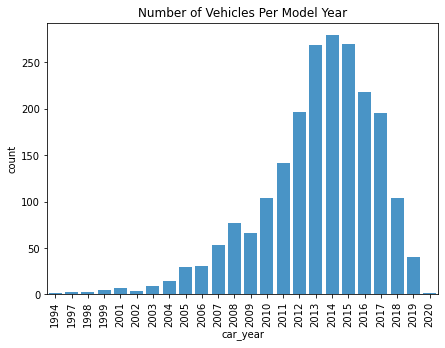

In [7]:
# plot number of cars by 'car_year'
ax = plt.figure(figsize=(7,5))
sns.countplot(df['car_year'], color='#3498db')

plt.title('Number of Vehicles Per Model Year')
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',  
);

79,113 is the mean mileage


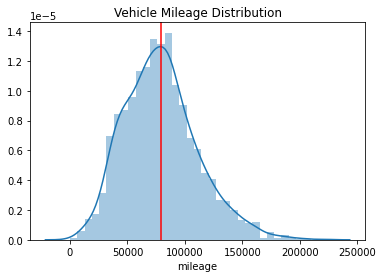

In [8]:
# plot mean mileage
mileage_mean = df['mileage'].mean()
sns.distplot(df['mileage'])
plt.axvline(df['mileage'].mean(), color='red')
plt.title('Vehicle Mileage Distribution')
print(f'{mileage_mean:,.0f} is the mean mileage')

we can see that there are several features that effect the target(Price) of the used car. 

1. mileage vs price.

the price of the car is negativly correlated with the price of the car. as the mileae goes up the price of the car will go down.


2. mpg vs price. 

the MPG of the car, city and highway, are both positivly correlated with the price of the ca. this may be do to the fact that the newer cars have better mpg and thus cost more. not nessisarily because of the mpg but because of the year of the car. we can see this relationship in the heat map. the year of the car is related to the mpg of the car.


3. year of car vs price. 

the year is positivly correlated to the price of the car. the newer cars generally cost more on resale

4. tubo vs price.

flex fuel has almost no effect on the resale value of a car. on the other hand cars that have tubos, or are hybrids have a positvive relationship with a cars resale value.

## model selection working data set 

In [9]:
# get base line prediction and mean absolute error score

#. get mean
price_mean = df['price'].mean()

#. get prediction with mean
y_pred = [price_mean] * len(df['price'])

#. get base line score
baseline = mean_absolute_error(y_pred,df['price'])
                               
print(f'Baseline error of {baseline:.2f} if mean was used')

Baseline error of 1396.30 if mean was used


In [10]:
# train, val test split @ 20% for test and val.
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

# simple pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=100,
                          random_state=42,
                          max_depth=25,
                          n_jobs=-1)
)

# simple prediction
pipeline.fit(X_train, y_train);
y_pred = pipeline.predict(X_val)
y_pred2 = pipeline.predict(X_train)
print('Simple random forest model:')
print('Test score',mean_absolute_error(y_train, y_pred2))
print('val score',mean_absolute_error(y_val, y_pred))

Simple random forest model:
Test score 367.7965883391437
val score 980.1795673549657


### feature selection

In [11]:
# make the transformer pipeline
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

# fit transformations
X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

# fit model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

# create permuter
permuter = PermutationImportance (
    model,
    scoring='neg_mean_absolute_error',
    n_iter=5,
    random_state=42
)

# fit permuter
permuter.fit(X_val_transformed, y_val)

PermutationImportance(cv='prefit',
                      estimator=RandomForestRegressor(bootstrap=True,
                                                      ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      max_samples=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators=100

In [12]:
# get feature importace values
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

mileage              347.034507
car_year             287.816678
size                  71.578720
high_mpg              68.153794
car_type              55.615764
city_mpg              45.001935
make                  33.286336
engine                30.197322
ext_color             13.652419
transmission           6.945268
turbo                  6.674938
int_color              4.788614
all_wheel_drive        1.456094
rear_wheel_drive       0.940177
front_wheel_drive     -2.847906
dtype: float64

In [13]:
# graph feature importance with STD
eli5.show_weights(
    permuter,
    top=None,
    feature_names=feature_names
)

Weight,Feature
347.0345 ± 88.7928,mileage
287.8167 ± 67.5537,car_year
71.5787 ± 31.3330,size
68.1538 ± 15.6263,high_mpg
55.6158 ± 10.4930,car_type
45.0019 ± 17.2903,city_mpg
33.2863 ± 14.7280,make
30.1973 ± 19.0131,engine
13.6524 ± 9.9959,ext_color
6.9453 ± 10.0720,transmission


In [14]:
# minimum importance of 10 cut off
minimum_importance = 10
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_perm = X_train[features]
X_val_perm = X_val[features]
X_test_perm = X_test[features]

In [15]:
# fit model with features > 10 (importance)
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    RandomForestRegressor(n_estimators=100,
                          random_state=42,
                          max_depth=25,
                          n_jobs=-1)
)

pipeline.fit(X_train_perm,y_train)
y_pred = pipeline.predict(X_val_perm)
mae = mean_absolute_error(y_val,y_pred)
print('Validation Accuracy', mae)

Validation Accuracy 960.0595575221239


In [16]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train_perm)
X_val_encoded = encoder.fit_transform(X_val_perm)


In [17]:
model = RandomForestRegressor(n_estimators=100,
                          random_state=42,
                          max_depth=25,
                          n_jobs=-1)

In [18]:
model.fit(X_train_encoded, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [19]:
y_pred = model.predict(X_val_encoded)
mae = mean_absolute_error(y_val,y_pred)
print('Test Accuracy', mae)

Test Accuracy 960.0595575221239


In [20]:
# test set
y_pred = pipeline.predict(X_test_perm)
mae = mean_absolute_error(y_test,y_pred)
print('Test Accuracy', mae)

Test Accuracy 950.6182547169811


## partial dependence

In [21]:
####### deleted code 

# # make the transformer pipeline
# transformers = make_pipeline(
#     ce.OrdinalEncoder(), 
#     SimpleImputer(strategy='median')
# )

# # fit transformations
# X_train_transformed = transformers.fit_transform(X_train_int)
# X_val_transformed = transformers.transform(X_val_int)


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


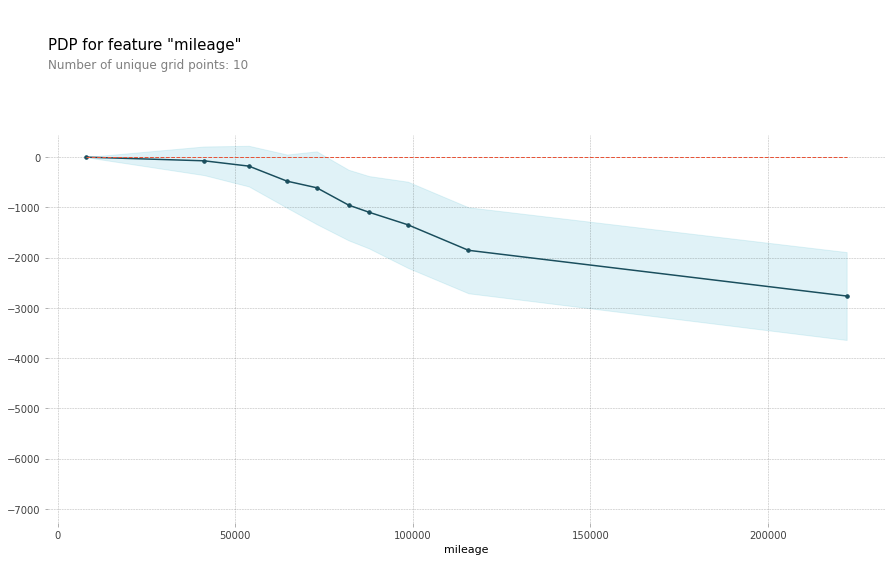

In [22]:
# change DPI
plt.rcParams['figure.dpi'] = 72

# use only int. features
df_int = df[['price','mileage','city_mpg','high_mpg','car_year','size','turbo','rear_wheel_drive','all_wheel_drive','front_wheel_drive']]

# train, val test split @ 20% for test and val.
train, test = train_test_split(df_int, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df_int.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train_int = train[features]
X_val_int = val[features]
X_test_int = test[features]

# get target vectors
y_train_int = train[target]
y_val_int = val[target]
y_test_int = test[target]

# fit model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_int, y_train)

# partial dependence plot
feature = 'mileage'

# create isolared value
isolated = pdp_isolate(
    model=model,
    dataset=X_val_int,
    model_features=X_val_int.columns,
    feature=feature
)

# plot isolated partial dependenct
pdp_plot(isolated, feature_name=feature);

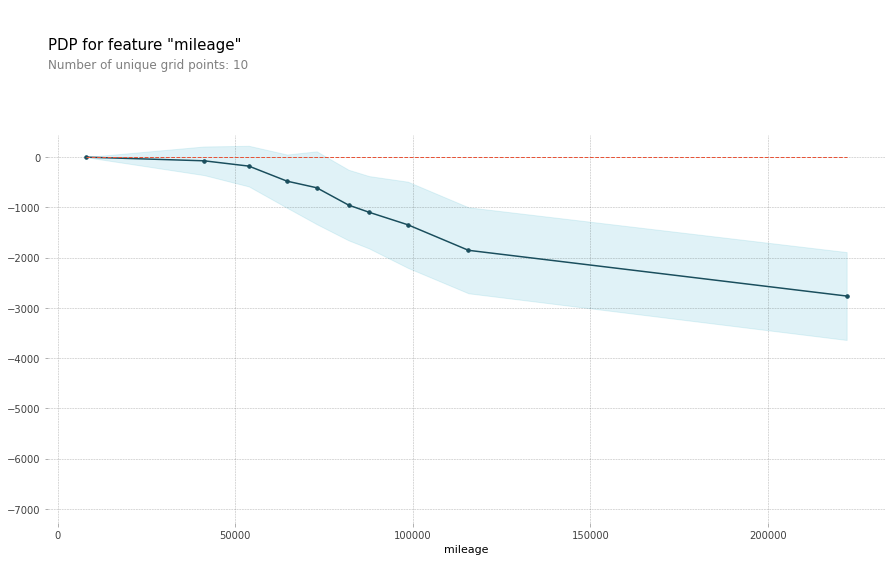

In [23]:
# partial dependence plot
feature = 'mileage'

# create isolared value
isolated = pdp_isolate(
    model=model,
    dataset=X_val_int,
    model_features=X_val_int.columns,
    feature=feature
)

# plot isolated partial dependenct
pdp_plot(isolated, feature_name=feature);

(20000.0, 150000.0)

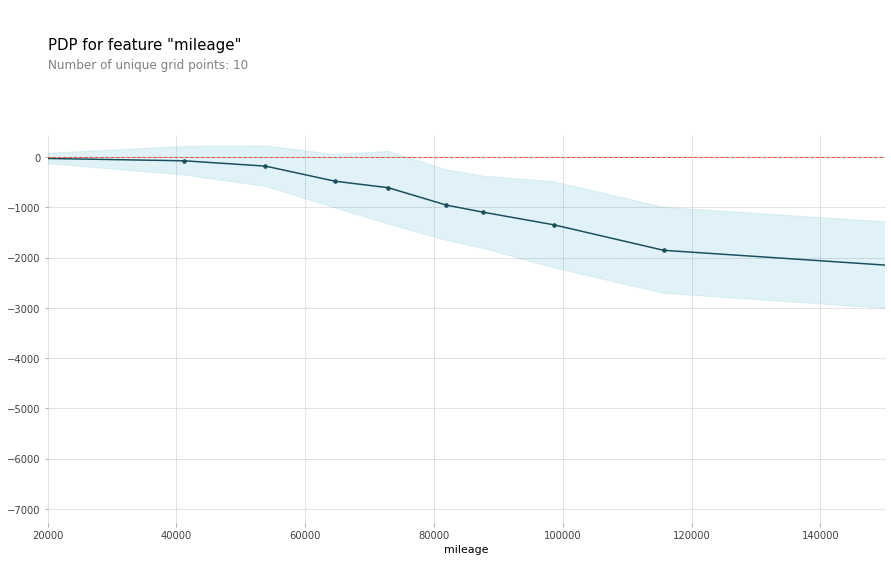

In [24]:
# plot partial dependence plot with range (ie: mileage of 20k to 150k)
pdp_plot(isolated, feature_name=feature)

# x limit
plt.xlim(20000, 150000)

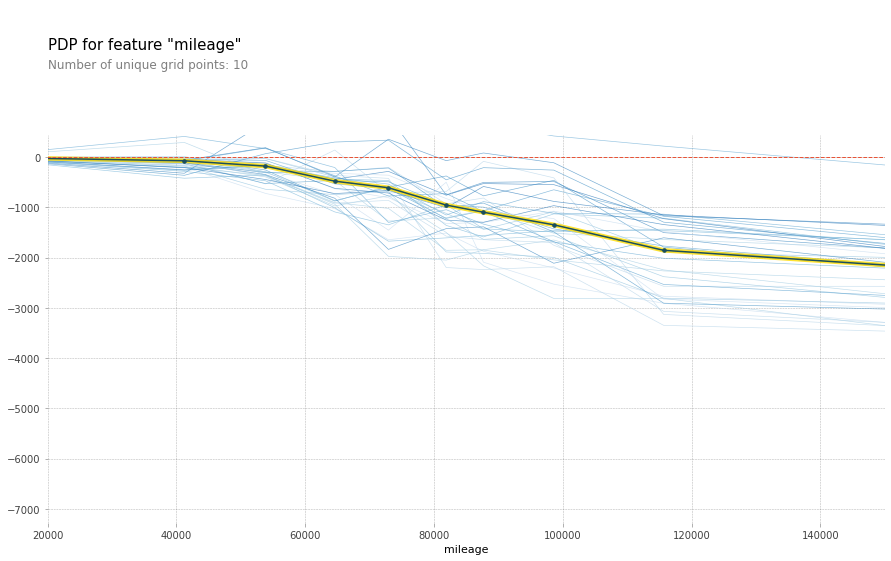

In [25]:
# plot mean with 1% of the obsservations
pdp_plot(isolated
         ,feature_name=feature
         ,plot_lines=True 
         ,frac_to_plot=0.1
         )

plt.xlim(20000,150000);

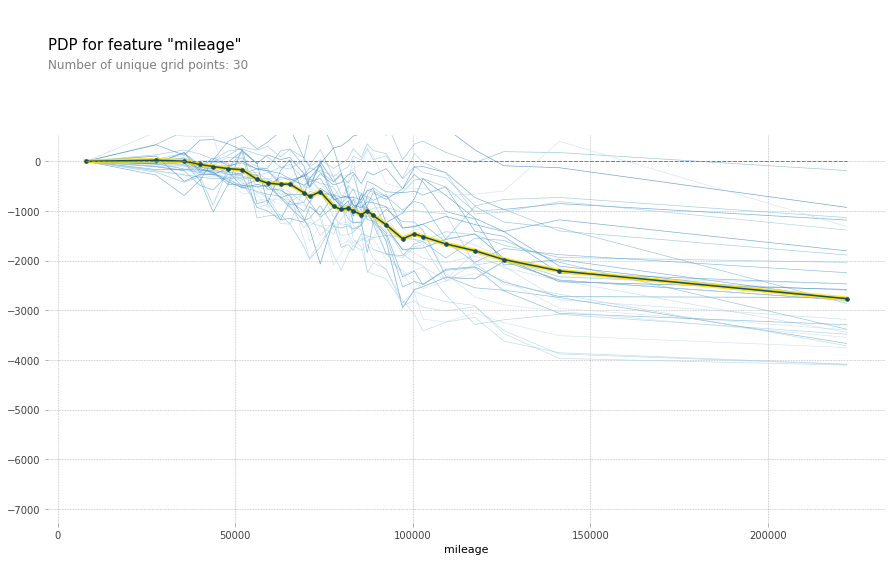

In [26]:
# partial dependasncy plot with more grid points.
isolated = pdp_isolate(
    model=model,
    dataset=X_val_int,
    model_features=X_val_int.columns,
    feature=feature,
    num_grid_points=30 ##
)

pdp_plot(isolated, feature_name=feature,plot_lines=True,
         frac_to_plot=0.1);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


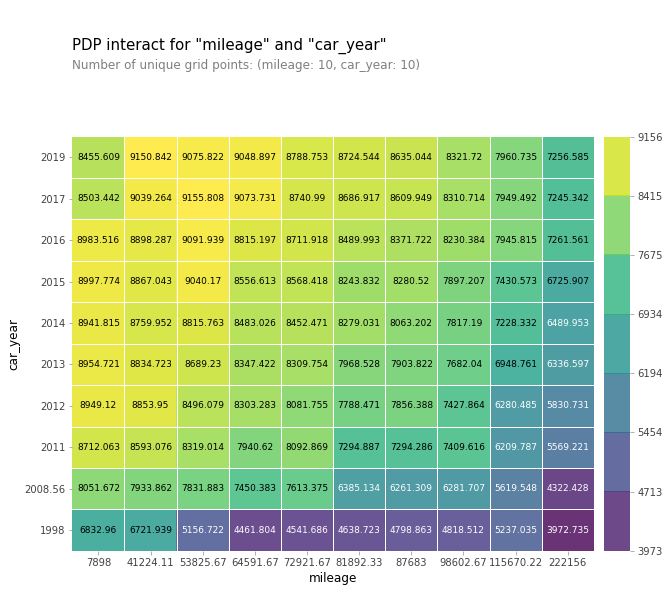

In [27]:
# confusion matrix for mileage and car_year

## interaction of two features
features = ['mileage', 'car_year']
interaction = pdp_interact(
    model=model,
    dataset=X_val_int,
    model_features=X_val_int.columns,
    features=features
)

## plot interaction
pdp_interact_plot(interaction, plot_type='grid',
                  feature_names=features, figsize=(10,10));

## SHAP

In [28]:
# shap values for single row
row = X_val_int.iloc[[0]]

## create explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap_values

array([[-219.85656338,    6.34073675,    7.26391824,  686.31649401,
         -18.06069808,  -26.46639536,   -2.08341781,    5.66202614,
          -3.10271555]])

In [29]:
# pair shap values with the features

feature_names = row.columns
feature_values =row.values[0]

shaps = pd.Series(shap_values[0],zip(feature_names, feature_values))
shaps

(mileage, 87808.0)         -219.856563
(city_mpg, 29.0)              6.340737
(high_mpg, 38.0)              7.263918
(car_year, 2016.0)          686.316494
(size, 1.8)                 -18.060698
(turbo, 0.0)                -26.466395
(rear_wheel_drive, 0.0)      -2.083418
(all_wheel_drive, 0.0)        5.662026
(front_wheel_drive, 1.0)     -3.102716
dtype: float64

In [30]:
# plot the effect of each feature on the price of the car

explainer.expected_value, y_train.mean()

explainer.expected_value + shaps.sum() 

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
    )

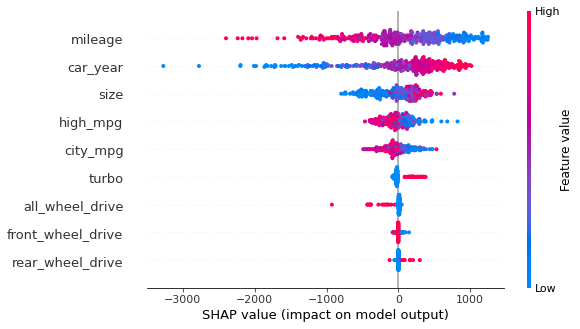

In [31]:
# shap summary
shap_values_full = explainer.shap_values(X_val_int)
shap.summary_plot(shap_values_full,X_val_int)

## XGBOOST

In [32]:
# use only int. features
df_int = df[['price','mileage','city_mpg','high_mpg','car_year','size','turbo','rear_wheel_drive','all_wheel_drive','front_wheel_drive']]

# train, val test split @ 20% for test and val.
train, test = train_test_split(df_int, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df_int.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

print('Splits shape:', train.shape, val.shape, test.shape)
print('Feature matrix shape:', X_train.shape, X_val.shape, X_test.shape)
print('Target vector shape:', y_train.shape, y_val.shape, y_test.shape)

# use xgboost to predict 
model=xgb.XGBRegressor(random_state=1, n_estimators=1000, learning_rate=0.01)
model.fit(X_train, y_train)
print(mean_absolute_error(y_train, model.predict(X_train)))
print(mean_absolute_error(y_val, model.predict(X_val)))


Splits shape: (1356, 10) (339, 10) (424, 10)
Feature matrix shape: (1356, 9) (339, 9) (424, 9)
Target vector shape: (1356,) (339,) (424,)
[02:05:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
877.7603482496773
1048.5251652090246


## Random CV

In [ ]:
# implementing random search with a randomforestregression model

# train, val test split @ 20% for test and val.
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.2, random_state=42)

# get target and features
target = 'price'
features = df.drop(target, axis=1).columns.to_list()

# get feature matrix
X_train = train[features]
X_val = val[features]
X_test = test[features]

# get target vectors
y_train = train[target]
y_val = val[target]
y_test = test[target]

# check the shape
print('Splits shape:', train.shape, val.shape, test.shape)
print('Feature matrix shape:', X_train.shape, X_val.shape, X_test.shape)
print('Target vector shape:', y_train.shape, y_val.shape, y_test.shape)

# pipelinr
pipeline = make_pipeline(
     ce.OrdinalEncoder(),
     RandomForestRegressor(random_state=42)
)

# param to test
p_distributions = {
    'randomforestregressor__n_estimators':range(200,400),
    'randomforestregressor__min_samples_leaf':range(1,6),
    'randomforestregressor__min_samples_split':range(1,15),
    'randomforestregressor__max_depth':range(1,50)
}

# random search cv
search = RandomizedSearchCV(
    pipeline,
    param_distributions=p_distributions,
    n_iter = 100,
    cv=10,
    scoring='neg_mean_absolute_error',
    verbose=10,
    return_train_score=True,
    n_jobs=-1
)

# fit
search.fit(X_train, y_train);

# get  val score
pipeline = search.best_estimator_
y_pred = pipeline.predict(X_val)

# check val score and the model used
print('\n',search.best_params_)
print('\n',-search.best_score_)
print('\n',mean_absolute_error(y_val, y_pred))